In [2]:
import time

import json

import wandb
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from easydict import EasyDict as edict

In [2]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: sang-hyun (use `wandb login --relogin` to force relogin)


True

In [3]:
train_path = "/opt/ml/detection/dataset/train.json"
with open(train_path, "r") as f:
    train_json = json.load(f)
print(train_json.keys())
tr_dict = edict(train_json)


dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])


In [4]:
print(tr_dict.images[0].keys())
tr_dict.annotations[0]

dict_keys(['width', 'height', 'file_name', 'license', 'flickr_url', 'coco_url', 'date_captured', 'id'])


{'image_id': 0,
 'category_id': 0,
 'area': 257301.66,
 'bbox': [197.6, 193.7, 547.8, 469.7],
 'iscrowd': 0,
 'id': 0}

In [5]:
palette = [
    'Chartreuse','BlueViolet','Crimson','DarkOrange','DodgerBlue',
    'Gold','HotPink','SkyBlue','Wheat','Tan',
]
classes=[
    'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass',
    'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing'
]

In [26]:
wandb.init(
    entity="passion-ate",
    project='images-with-bbox',
    name="original-training-set"
)

/opt/conda/envs/openmmlab/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


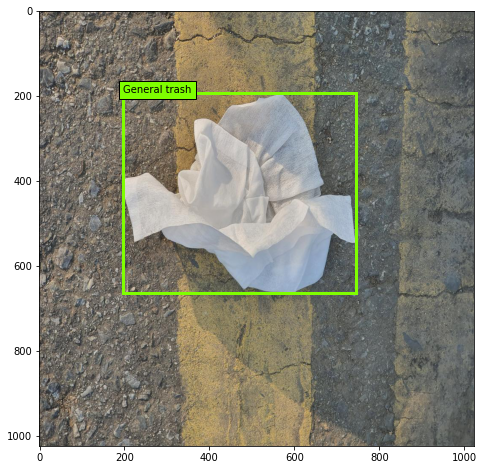

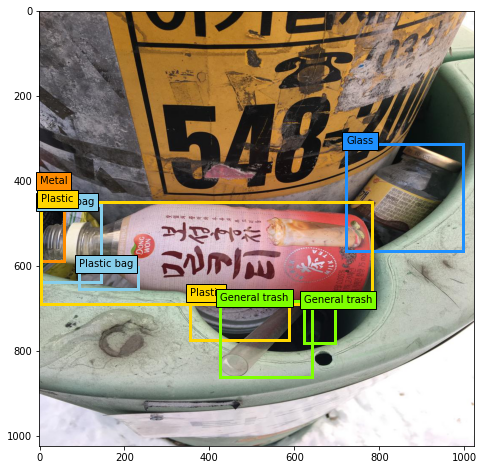

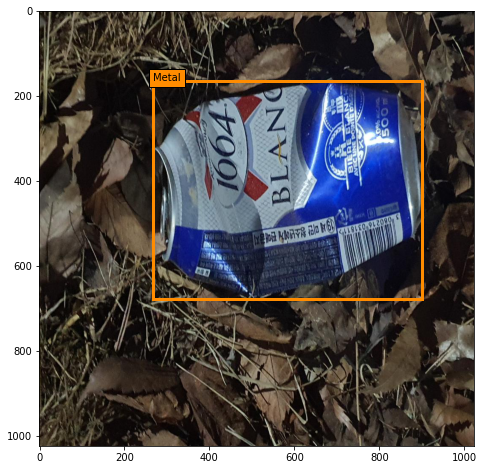

In [8]:

tr_image_prefix = "/opt/ml/detection/dataset/"

for im in tr_dict.images[:100]:
    fig, ax = plt.subplots(figsize=(8, 8))
    im_name = tr_image_prefix + im.file_name
    Img = Image.open(im_name)
    ax.imshow(Img)
    
    for anno in tr_dict.annotations:
        if anno.image_id == im.id:
            x1, y1, w, h = anno.bbox
            color = palette[anno.category_id]
            rect = patches.Rectangle(
                xy=(x1, y1),
                width=w, height=h,
                linewidth=3, edgecolor=color, facecolor='none',
            )
            ax.add_patch(rect)
            ax.text(
                x=x1, y=y1, s=classes[anno.category_id],
                bbox=dict(facecolor=color, alpha=1)
            )
    #wandb.log({"plot": fig})
    time.sleep(0.01)
    plt.show()